#Image Features and Homographies

In [183]:
# import libraries
import numpy as np
import math
import matplotlib.pyplot as plt

#Problem #1
Find the Hough transform (using the normal equation of a line) for the lines enclosing an object
with vertices A=(2,0), B=(2,2) and C=(0,2). Sketch the modified object enclosed by lines replacing
(rho,theta) of the given object lines with (rho*rho,theta + 90). Calculate the area of the modified
object.

[[2.         0.        ]
 [1.41421356 0.78539816]
 [2.         1.57079633]]


/tmp/ipykernel_18692/3863113121.py:24: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -lines[i,0]/lines[i,1]
/tmp/ipykernel_18692/3863113121.py:25: RuntimeWarning: divide by zero encountered in double_scalars
  theta = math.atan(-1/slope)
/tmp/ipykernel_18692/3863113121.py:28: RuntimeWarning: divide by zero encountered in double_scalars
  x = -b/(slope+1/slope)


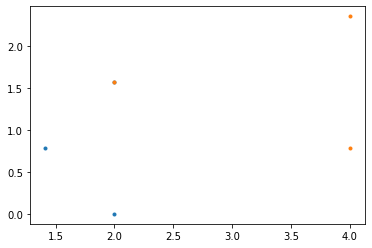

In [184]:
# Find all lines from point pairs
def points2lines(points):
    lines = np.zeros([1,3])
    r,c = points.shape
    while(r>1):
        for i in np.arange(1,r):
            line = np.cross(points[i,:], points[0,:])
            lines = np.vstack([lines, line])
        points = points[1:,:]
        r,c = points.shape
    lines = lines[1:,:]
    return lines

# Turn the points into homogeneous coordinates
def xy2homo(points):
    r,c = points.shape
    points = np.hstack([points, np.ones([r,1])])
    return points

# Convert x-y pairs into rho-theta pairs
def xy2rhotheta(lines):
    rhotheta = np.zeros([lines.shape[0],2])
    for i in range(lines.shape[0]):
        slope = -lines[i,0]/lines[i,1]
        theta = math.atan(-1/slope)
        if theta !=(0):
            b = -lines[i,2]/lines[i,1]
            x = -b/(slope+1/slope)
            y = slope*x + b
            rho = x*np.cos(theta) + y*np.sin(theta)
        else:
            rho = -lines[i,2]/lines[i,0]
        rhotheta[i,:] = [rho, theta]
    return rhotheta

A = [2,0]
B = [2,2]
C = [0,2]

points = np.vstack([A,B,C])

points = xy2homo(points)
lines = points2lines(points)
rhotheta = xy2rhotheta(lines)
print(rhotheta)
plt.plot(rhotheta[:,0], rhotheta[:,1],'.')
plt.plot(rhotheta[:,0]**2, rhotheta[:,1]+np.pi/4,'.')
plt.show()
